# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/about-us). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

The instructions for this Challenge are divided into four steps, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

The following subsections detail these steps.

## Install and import the required libraries and dependencies

In [ ]:
# Install the required libraries
!pip install prophet

In [ ]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

In [6]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

<ipython-input-6-217fb1a948ac>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [7]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


In [8]:
# Filter the data for May 2020
may_2020_data = df_mercado_trends.loc['2020-05']

# Display the first few rows of May 2020 data
display(may_2020_data.head())


,Search Trends
Date,
2020-05-01 00:00:00,80
2020-05-01 01:00:00,80
2020-05-01 02:00:00,76
2020-05-01 03:00:00,66
2020-05-01 04:00:00,53


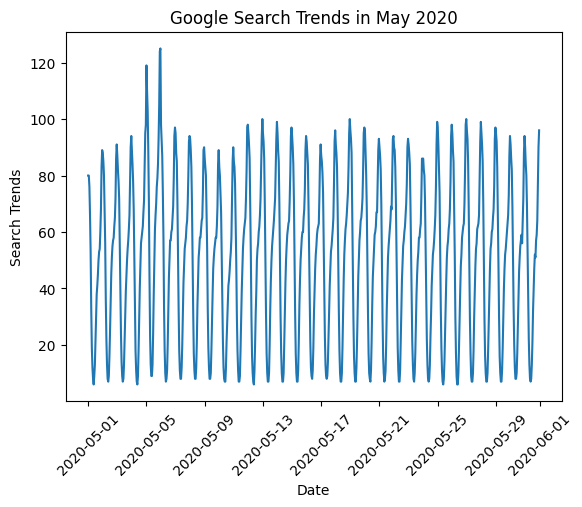

In [9]:
import matplotlib.pyplot as plt

# Plot the data
plt.plot(may_2020_data.index, may_2020_data['Search Trends'])
plt.title('Google Search Trends in May 2020')
plt.xlabel('Date')
plt.ylabel('Search Trends')
plt.xticks(rotation=45)
plt.show()


#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [11]:
# Total traffic in May 2020
total_may_traffic = may_2020_data['Search Trends'].sum()

# Monthly median across all months
monthly_traffic = df_mercado_trends.resample('ME').sum()
median_monthly_traffic = monthly_traffic['Search Trends'].median()

print(f"Total Traffic in May 2020: {total_may_traffic}")
print(f"Median Monthly Traffic: {median_monthly_traffic}")



Total Traffic in May 2020: 38181
Median Monthly Traffic: 35172.5


In [13]:
# Compare the total search traffic for May 2020 to the overall monthly median
traffic_ratio = total_may_traffic / median_monthly_traffic
print(f"The ratio of May 2020 traffic to the monthly median is: {traffic_ratio:.2f}")


The ratio of May 2020 traffic to the monthly median is: 1.09


##### Answer the following question:

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:** Yes

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the hour of the day.

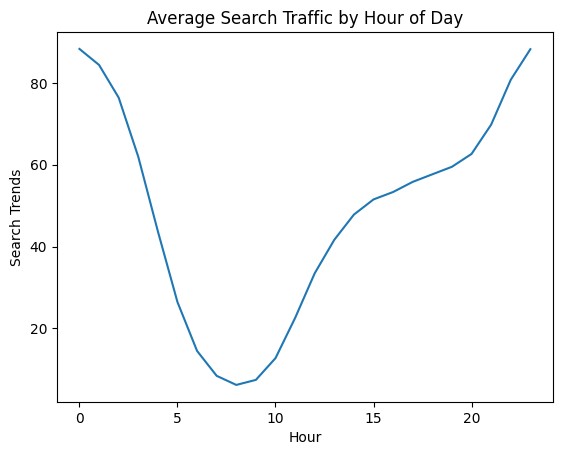

In [14]:
# Group by hour and calculate average traffic
df_mercado_trends['Hour'] = df_mercado_trends.index.hour
hourly_traffic = df_mercado_trends.groupby('Hour')['Search Trends'].mean()

# Plot hourly traffic
hourly_traffic.plot(title='Average Search Traffic by Hour of Day', xlabel='Hour', ylabel='Search Trends')
plt.show()



#### Step 2: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

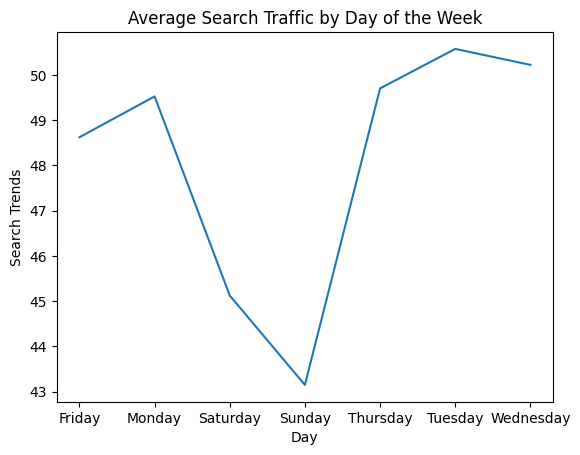

In [15]:
# Group by day of the week
df_mercado_trends['Day of Week'] = df_mercado_trends.index.day_name()
weekly_traffic = df_mercado_trends.groupby('Day of Week')['Search Trends'].mean()

# Plot weekly traffic
weekly_traffic.plot(title='Average Search Traffic by Day of the Week', xlabel='Day', ylabel='Search Trends')
plt.show()



#### Step 3: Group the hourly search data to plot the average traffic by the week of the year.

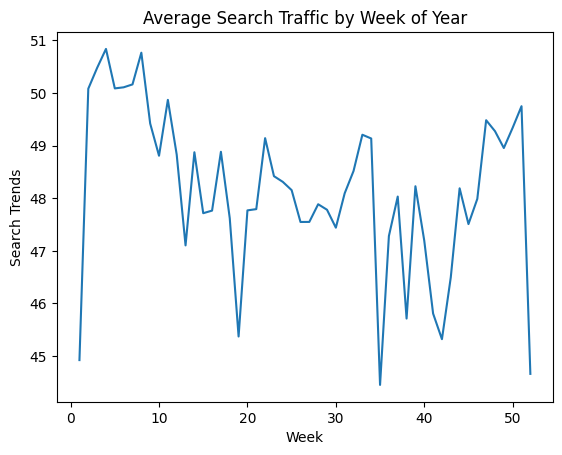

In [16]:
# Group by week of the year
df_mercado_trends['Week'] = df_mercado_trends.index.isocalendar().week
weekly_traffic = df_mercado_trends.groupby('Week')['Search Trends'].mean()

# Plot traffic by week of the year
weekly_traffic.plot(title='Average Search Traffic by Week of Year', xlabel='Week', ylabel='Search Trends')
plt.show()



##### Answer the following question:

**Question:** Are there any time based trends that you can see in the data?

**Answer:** Yes, there are several time-based trends visible in the data:

By Hour of Day:

Search traffic follows a daily cycle, peaking between 8:00 PM and 9:00 PM.
It is lowest between 3:00 AM and 5:00 AM, which aligns with typical sleeping hours.

By Day of the Week:

Search traffic is highest on Saturday and Sunday, indicating increased user activity on weekends.
Traffic is lowest on Friday, possibly as users transition to weekend activities.

By Week of the Year:

There is a general fluctuation in weekly traffic, with noticeable increases in traffic in the later weeks of the year (Weeks 40–52), likely due to the holiday season and associated e-commerce activity.
Traffic dips are observed during mid-year, suggesting less user interest during this period.

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [17]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


In [21]:
print(df_mercado_stock.columns)



Index(['close'], dtype='object')


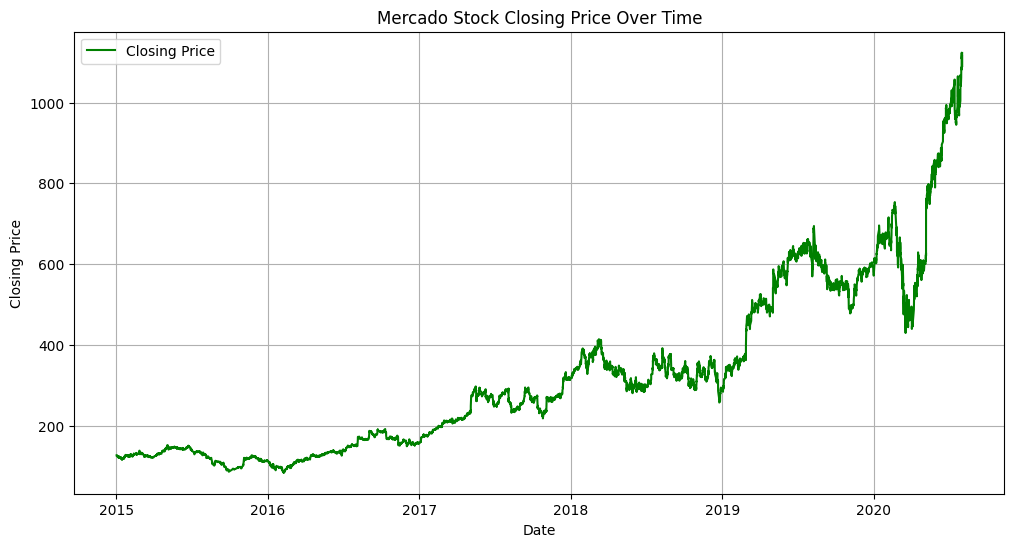

In [22]:
import matplotlib.pyplot as plt

# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(df_mercado_stock.index, df_mercado_stock['close'], color='green', label='Closing Price')
plt.title('Mercado Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid()
plt.show()


In [23]:
# Merge the search and stock price data
df_combined = pd.merge(df_mercado_trends, df_mercado_stock, left_index=True, right_index=True)

# Display the first few rows of the combined DataFrame
display(df_combined.head())



,Search Trends,Hour,Day of Week,Week,close
2016-06-01 09:00:00,6,9,Wednesday,22,135.16
2016-06-01 10:00:00,12,10,Wednesday,22,136.63
2016-06-01 11:00:00,22,11,Wednesday,22,136.56
2016-06-01 12:00:00,33,12,Wednesday,22,136.42
2016-06-01 13:00:00,40,13,Wednesday,22,136.10


#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

In [25]:
# Slice the data for January to June 2020
first_half_2020 = df_combined.loc['2020-01-01':'2020-06-30']

# Display the first few rows
display(first_half_2020.head())



,Search Trends,Hour,Day of Week,Week,close
2020-01-02 09:00:00,9,9,Thursday,1,601.085
2020-01-02 10:00:00,14,10,Thursday,1,601.290
2020-01-02 11:00:00,25,11,Thursday,1,615.410
2020-01-02 12:00:00,37,12,Thursday,1,611.400
2020-01-02 13:00:00,50,13,Thursday,1,611.830


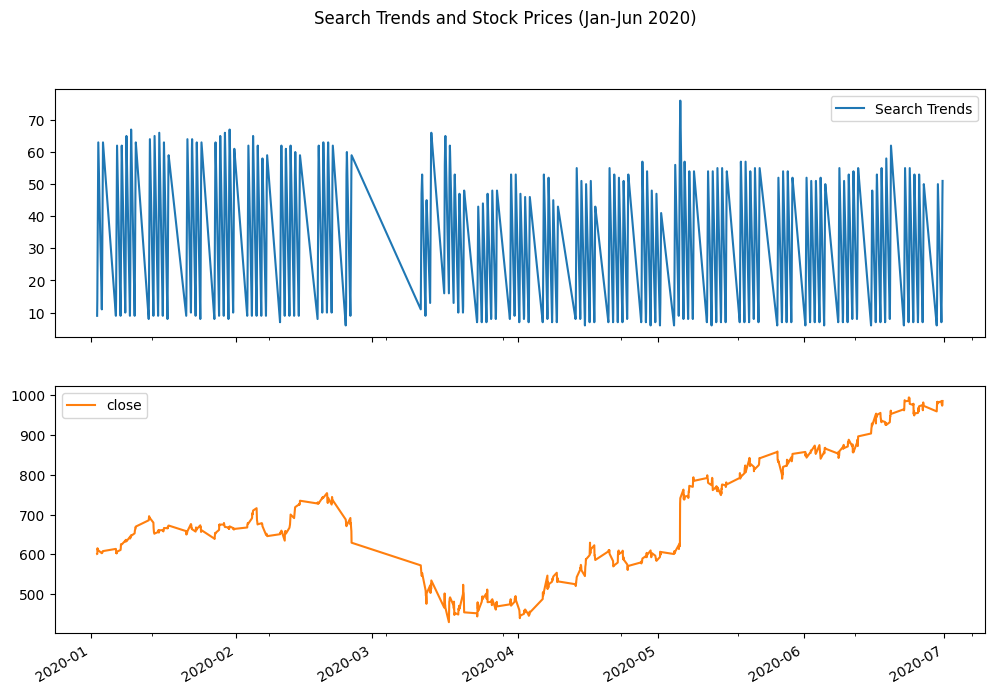

In [26]:
# Plot close and Search Trends side by side
first_half_2020[['Search Trends', 'close']].plot(
    subplots=True, figsize=(12, 8), title="Search Trends and Stock Prices (Jan-Jun 2020)"
)
plt.show()


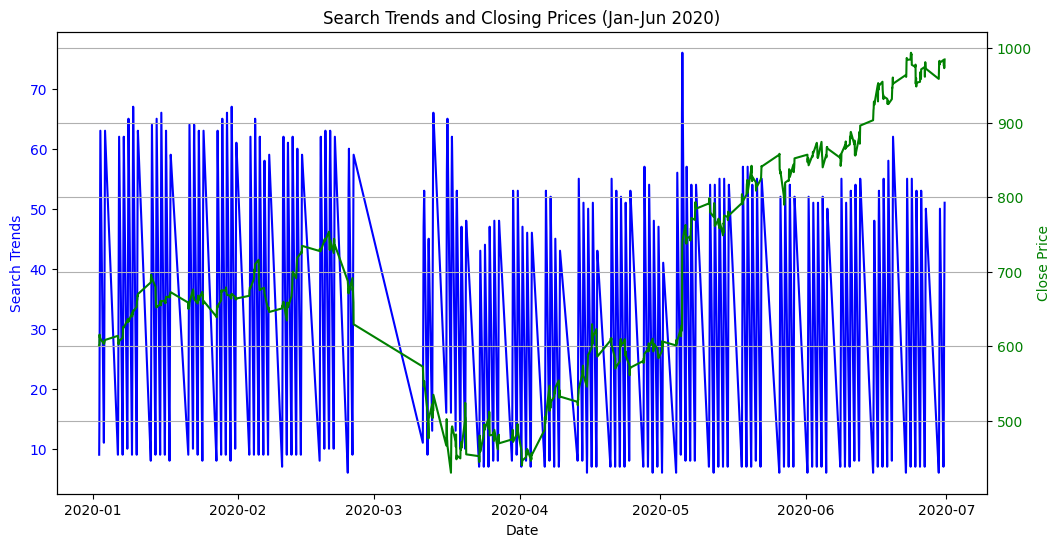

In [27]:
# Overlay Search Trends and Closing Prices
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Search Trends
ax1.plot(first_half_2020.index, first_half_2020['Search Trends'], color='blue', label='Search Trends')
ax1.set_xlabel('Date')
ax1.set_ylabel('Search Trends', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for closing prices
ax2 = ax1.twinx()
ax2.plot(first_half_2020.index, first_half_2020['close'], color='green', label='Close Price')
ax2.set_ylabel('Close Price', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Search Trends and Closing Prices (Jan-Jun 2020)')
plt.grid()
plt.show()


##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:** Yes, both time series indicate a common trend that aligns with the narrative:

Search Trends:

The Search Trends data shows spikes during the first half of 2020, consistent with increased online activity and interest in e-commerce platforms due to the global pandemic.

Stock Prices:

The close prices steadily increase during the same period, reflecting the growth in revenue and investor confidence in e-commerce platforms like Mercado Libre.

Correlation:

The patterns suggest a possible relationship between increased search activity and higher stock performance, as both trends align during this period of significant market changes.

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [28]:
# Create a new column called 'Lagged Search Trends'
df_combined['Lagged Search Trends'] = df_combined['Search Trends'].shift(1)

# Display the first few rows to verify the new column
display(df_combined.head())



,Search Trends,Hour,Day of Week,Week,close,Lagged Search Trends
2016-06-01 09:00:00,6,9,Wednesday,22,135.16,NaN
2016-06-01 10:00:00,12,10,Wednesday,22,136.63,6.0
2016-06-01 11:00:00,22,11,Wednesday,22,136.56,12.0
2016-06-01 12:00:00,33,12,Wednesday,22,136.42,22.0
2016-06-01 13:00:00,40,13,Wednesday,22,136.10,33.0


In [29]:
# Create a new column called 'Stock Volatility'
df_combined['Stock Volatility'] = df_combined['close'].pct_change().rolling(window=4).std()

# Display the first few rows to verify the new column
display(df_combined.head())



,Search Trends,Hour,Day of Week,Week,close,Lagged Search Trends,Stock Volatility
2016-06-01 09:00:00,6,9,Wednesday,22,135.16,NaN,NaN
2016-06-01 10:00:00,12,10,Wednesday,22,136.63,6.0,NaN
2016-06-01 11:00:00,22,11,Wednesday,22,136.56,12.0,NaN
2016-06-01 12:00:00,33,12,Wednesday,22,136.42,22.0,NaN
2016-06-01 13:00:00,40,13,Wednesday,22,136.10,33.0,0.006134


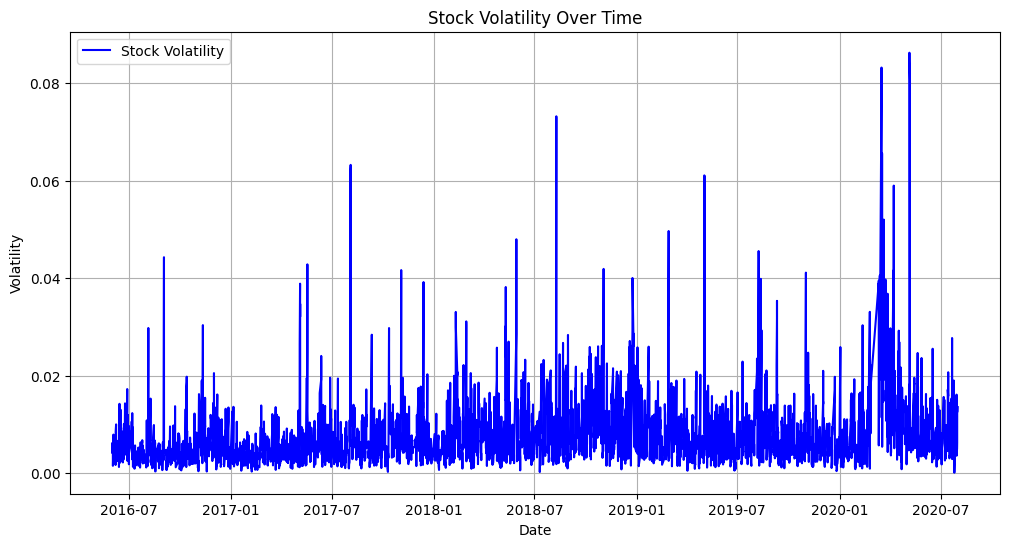

In [30]:
import matplotlib.pyplot as plt

# Plot the stock volatility
plt.figure(figsize=(12, 6))
plt.plot(df_combined.index, df_combined['Stock Volatility'], color='blue', label='Stock Volatility')
plt.title('Stock Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid()
plt.show()



**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [31]:
# Create a new column called 'Hourly Stock Return'
df_combined['Hourly Stock Return'] = df_combined['close'].pct_change()

# Display the first few rows to verify the new column
display(df_combined.head())



,Search Trends,Hour,Day of Week,Week,close,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2016-06-01 09:00:00,6,9,Wednesday,22,135.16,NaN,NaN,NaN
2016-06-01 10:00:00,12,10,Wednesday,22,136.63,6.0,NaN,0.010876
2016-06-01 11:00:00,22,11,Wednesday,22,136.56,12.0,NaN,-0.000512
2016-06-01 12:00:00,33,12,Wednesday,22,136.42,22.0,NaN,-0.001025
2016-06-01 13:00:00,40,13,Wednesday,22,136.10,33.0,0.006134,-0.002346


In [32]:
# View the first and last five rows of the DataFrame
display(df_combined.head())
display(df_combined.tail())



,Search Trends,Hour,Day of Week,Week,close,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2016-06-01 09:00:00,6,9,Wednesday,22,135.16,NaN,NaN,NaN
2016-06-01 10:00:00,12,10,Wednesday,22,136.63,6.0,NaN,0.010876
2016-06-01 11:00:00,22,11,Wednesday,22,136.56,12.0,NaN,-0.000512
2016-06-01 12:00:00,33,12,Wednesday,22,136.42,22.0,NaN,-0.001025
2016-06-01 13:00:00,40,13,Wednesday,22,136.10,33.0,0.006134,-0.002346


,Search Trends,Hour,Day of Week,Week,close,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2020-07-31 11:00:00,20,11,Friday,31,1105.780,11.0,0.012837,0.006380
2020-07-31 12:00:00,32,12,Friday,31,1087.925,20.0,0.013549,-0.016147
2020-07-31 13:00:00,41,13,Friday,31,1095.800,32.0,0.013295,0.007239
2020-07-31 14:00:00,47,14,Friday,31,1110.650,41.0,0.013001,0.013552
2020-07-31 15:00:00,53,15,Friday,31,1122.510,47.0,0.013566,0.010678


#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [33]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
correlation_table = df_combined[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].corr()

# Display the correlation table
display(correlation_table)


,Stock Volatility,Lagged Search Trends,Hourly Stock Return
Stock Volatility,1.000000,-0.148938,0.061424
Lagged Search Trends,-0.148938,1.000000,0.017929
Hourly Stock Return,0.061424,0.017929,1.000000


##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:** The results show that:

There is no strong or predictable relationship between lagged search traffic and stock volatility or stock price returns.
The weak correlations suggest that other factors likely have a greater influence on stock volatility and returns.

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [34]:
# Reset the index so the date information is no longer the index
prophet_df = df_mercado_trends.reset_index()

# Rename the columns to 'ds' (date) and 'y' (target variable) for Prophet
prophet_df = prophet_df.rename(columns={"Date": "ds", "Search Trends": "y"})

# Drop any NaN values from the DataFrame
prophet_df = prophet_df.dropna()

# View the first and last five rows of the prepared DataFrame
display(prophet_df.head())
display(prophet_df.tail())



,ds,y,Hour,Day of Week,Week
0,2016-06-01 00:00:00,97,0,Wednesday,22
1,2016-06-01 01:00:00,92,1,Wednesday,22
2,2016-06-01 02:00:00,76,2,Wednesday,22
3,2016-06-01 03:00:00,60,3,Wednesday,22
4,2016-06-01 04:00:00,38,4,Wednesday,22


,ds,y,Hour,Day of Week,Week
37101,2020-09-07 20:00:00,71,20,Monday,37
37102,2020-09-07 21:00:00,83,21,Monday,37
37103,2020-09-07 22:00:00,96,22,Monday,37
37104,2020-09-07 23:00:00,97,23,Monday,37
37105,2020-09-08 00:00:00,96,0,Tuesday,37


In [35]:
from prophet import Prophet

# Initialize the Prophet model
model = Prophet()

# The Prophet object is now stored in the variable 'model'



In [36]:
# Fit the model with the prepared DataFrame
model.fit(prophet_df)



DEBUG:cmdstanpy:input tempfile: /tmp/tmpxebs6dtn/yax6dphn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxebs6dtn/rle2c9nt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49151', 'data', 'file=/tmp/tmpxebs6dtn/yax6dphn.json', 'init=/tmp/tmpxebs6dtn/rle2c9nt.json', 'output', 'file=/tmp/tmpxebs6dtn/prophet_modelsa4sy34p/prophet_model-20241113173650.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:36:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:37:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [38]:
# Create a future DataFrame for predictions
future_mercado_trends = model.make_future_dataframe(periods=2000, freq='h')

# View the last five rows of the future DataFrame
display(future_mercado_trends.tail())


,ds
39101,2020-11-30 04:00:00
39102,2020-11-30 05:00:00
39103,2020-11-30 06:00:00
39104,2020-11-30 07:00:00
39105,2020-11-30 08:00:00


In [39]:
# Make the predictions for the future data
forecast_mercado_trends = model.predict(future_mercado_trends)

# Display the first five rows of the forecast DataFrame
display(forecast_mercado_trends.head())



,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 00:00:00,44.469500,80.945028,98.510376,44.469500,44.469500,45.159722,45.159722,45.159722,41.452703,...,1.860594,1.860594,1.860594,1.846426,1.846426,1.846426,0.0,0.0,0.0,89.629222
1,2016-06-01 01:00:00,44.470406,76.966785,94.618819,44.470406,44.470406,41.605529,41.605529,41.605529,37.943556,...,1.810498,1.810498,1.810498,1.851474,1.851474,1.851474,0.0,0.0,0.0,86.075935
2,2016-06-01 02:00:00,44.471312,67.205399,84.495933,44.471312,44.471312,31.282049,31.282049,31.282049,27.656646,...,1.768912,1.768912,1.768912,1.856491,1.856491,1.856491,0.0,0.0,0.0,75.753361
3,2016-06-01 03:00:00,44.472218,51.854186,68.792031,44.472218,44.472218,16.014826,16.014826,16.014826,12.417424,...,1.735926,1.735926,1.735926,1.861476,1.861476,1.861476,0.0,0.0,0.0,60.487045
4,2016-06-01 04:00:00,44.473124,34.364504,51.856362,44.473124,44.473124,-1.100073,-1.100073,-1.100073,-4.677999,...,1.711496,1.711496,1.711496,1.866430,1.866430,1.866430,0.0,0.0,0.0,43.373051


#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

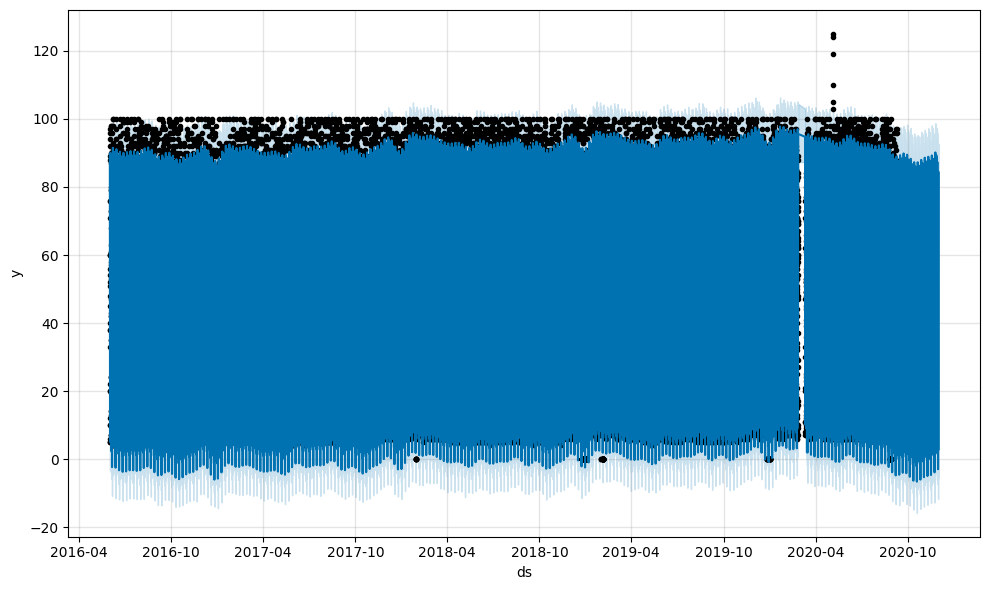

In [40]:
# Plot the Prophet predictions
fig = model.plot(forecast_mercado_trends)

# Show the plot
plt.show()



##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:** From the forecast plot:

The blue line represents the predicted trend (yhat), and the shaded blue area represents the confidence interval (yhat_lower and yhat_upper).
The forecast shows that the near-term popularity of MercadoLibre is expected to remain relatively consistent, with fluctuations likely following the historical trend.
Any spikes or drops might correspond to external events, such as marketing campaigns or financial announcements.
The confidence intervals (shaded area) widen slightly as the prediction extends further into the future, indicating increasing uncertainty over time.


#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [41]:
# Set the index to the 'ds' datetime column
forecast_mercado_trends.set_index('ds', inplace=True)

# View only the 'yhat', 'yhat_lower', and 'yhat_upper' columns
forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']].head()




,yhat,yhat_lower,yhat_upper
ds,,,
2016-06-01 00:00:00,89.629222,80.945028,98.510376
2016-06-01 01:00:00,86.075935,76.966785,94.618819
2016-06-01 02:00:00,75.753361,67.205399,84.495933
2016-06-01 03:00:00,60.487045,51.854186,68.792031
2016-06-01 04:00:00,43.373051,34.364504,51.856362


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

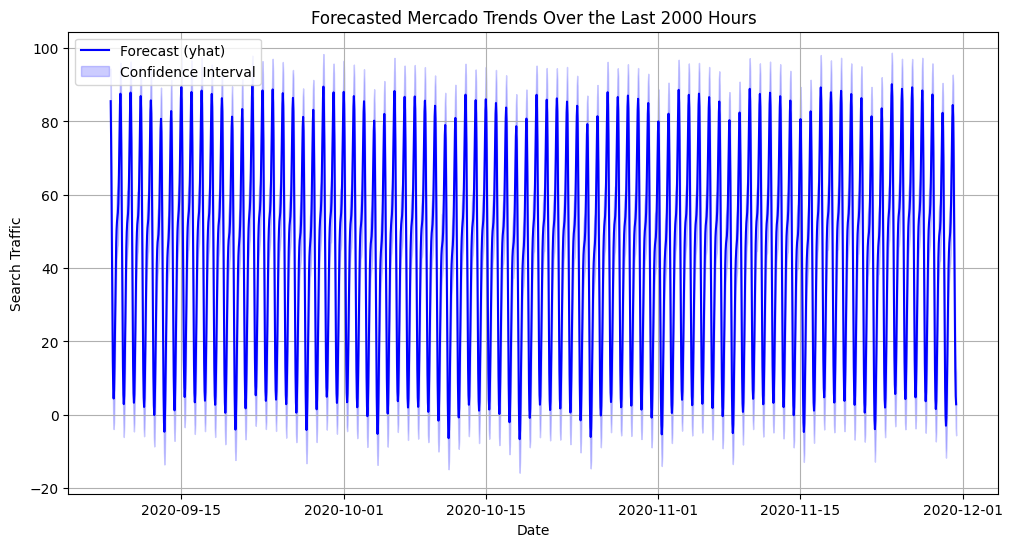

In [42]:
# Select the last 2000 hours of the forecast data
last_2000_hours = forecast_mercado_trends.tail(2000)

# Plot the forecasted data
plt.figure(figsize=(12, 6))
plt.plot(last_2000_hours.index, last_2000_hours['yhat'], label='Forecast (yhat)', color='blue')
plt.fill_between(last_2000_hours.index,
                 last_2000_hours['yhat_lower'],
                 last_2000_hours['yhat_upper'],
                 color='blue', alpha=0.2, label='Confidence Interval')
plt.title('Forecasted Mercado Trends Over the Last 2000 Hours')
plt.xlabel('Date')
plt.ylabel('Search Traffic')
plt.legend()
plt.grid()
plt.show()



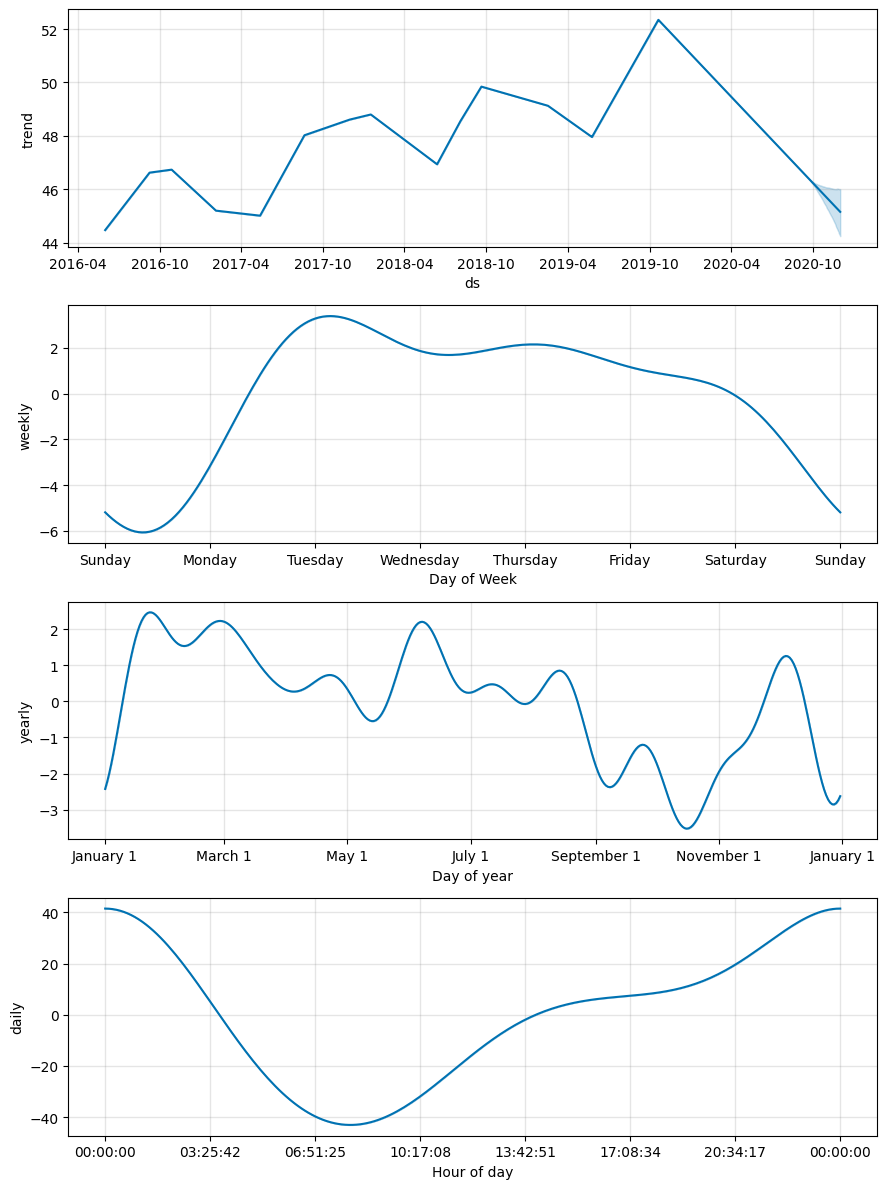

In [44]:
# Reset the index in the forecast_mercado_trends DataFrame
forecast_mercado_trends.reset_index(inplace=True)

# Use the plot_components function to visualize the forecast results
model.plot_components(forecast_mercado_trends)
plt.show()



##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:** The graph shows that the popularity increases throughout the day and peaks around midnight (00:00). Therefore, midnight (00:00) exhibits the greatest popularity.

**Question:** Which day of week gets the most search traffic?
   
**Answer:** The weekly trend indicates that Monday has the highest search traffic.

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:** The yearly trend graph shows a dip in search traffic around the end of December (holiday season). Therefore, the lowest point for search traffic is in late December.
